In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set();

**Problem** **description**

In [ ]:
#Rarely have pandemics garnered as much attention as they have recently with COVID-19.
#One important public health strategy for combating viral diseases like COVID-19 is vaccination.
#Individuals can receive immunizations from them, and a community's total immunization rate can further
#stop the spread of illness by creating "herd immunity."
#Investigating the 2009 H1N1 influenza pandemic, a recent historical pandemic of a highly contagious respiratory illness.
#The 2009 H1N1 flu virus, popularly known as the "swine flu," emerged in the spring and rapidly expanded around the globe.
#When the US government started a vaccination program in October 2009, H1N1 vaccines were first made available to the general public.
#The National 2009 H1N1 Flu Survey data, which was gathered to track vaccination rates during that campaign,
#will be examined. In addition to sharing personal details about their life, beliefs, and habits, participants
#in this phone survey were asked if they had received the seasonal and H1N1 vaccinations. Gaining further insight
#into the correlation between these traits and individual immunization trends could help direct future public health
#initiatives.
#Our  model helps to understand the psychology behind both the demographic and non-demographic influence on taking vaccines
#and aids in making better prediction and setting down rules for getting vaccines.
#Our model also helps to be better prepared for future pandemics and helps to improve the quality of vaccination and reduce cost of gathering information


**1. Loading data**


In [ ]:
# Increase maximal displayed columns

pd.options.display.max_columns=100

In [ ]:
# Load the data

df = pd.read_csv(
    '/content/training_set_features.csv',
    index_col="respondent_id"
)
y = pd.read_csv(
    '/content/training_set_labels.csv',
    index_col="respondent_id"
)

In [ ]:
# Observe top 10 feature observations (int)

df.head(10)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,5.0,2.0,1.0,5.0,4.0,4.0,65+ Years,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,saaquncn,vlluhbov
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,1.0,1.0,4.0,2.0,1.0,55 - 64 Years,< 12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,xicduogh,xtkaffoo
7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,5.0,2.0,1.0,4.0,2.0,1.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,pxcmvdjn,xqwwgdyp
8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,1.0,1.0,4.0,2.0,1.0,45 - 54 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,bhuqouqj,"MSA, Not Principle City",1.0,0.0,xicduogh,ccgxvspp


In [ ]:
# Observe last 10 feature observations (int)

df.tail(10)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
26697,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,2.0,2.0,65+ Years,College Graduate,White,Male,"> $75,000",Married,Own,Not in Labor Force,kbazzjca,"MSA, Principle City",1.0,0.0,NaN,NaN
26698,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,4.0,4.0,2.0,35 - 44 Years,College Graduate,White,Female,"> $75,000",Married,Own,Employed,atmpeygn,"MSA, Not Principle City",1.0,1.0,dotnnunm,mxkfnird
26699,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,5.0,5.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,pxcmvdjn,xgwztkwe
26700,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,4.0,2.0,5.0,5.0,4.0,5.0,55 - 64 Years,12 Years,White,Female,"> $75,000",Married,Own,Not in Labor Force,lzgpxyit,"MSA, Principle City",1.0,0.0,NaN,NaN
26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0,2.0,4.0,4.0,2.0,4.0,18 - 34 Years,College Graduate,White,Female,"> $75,000",Not Married,Rent,Not in Labor Force,fpwskwrf,"MSA, Principle City",3.0,0.0,NaN,NaN
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


In [ ]:
# Print all the columns/features names (int)

df.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [ ]:
# Print data size (int)

print("The number of rows and columns in the training set are: ", df.shape)

The number of rows and columns in the training set are:  (26707, 35)


In [ ]:
# Print data size (number of observations)

print("The number of observations in the data is: ",df.shape[0])

The number of observations in the data is:  26707


In [ ]:
# Print data size (number of features)

print("The number of features in the data is: ",df.shape[1])

The number of features in the data is:  35


In [ ]:
# Observe top 10 label observations (int)

y.head(10)

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
5,0,0
6,0,0
7,1,1
8,0,0


In [ ]:
# Observe last 10 label observations (int)

y.tail(10)

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26697,0,0
26698,0,1
26699,0,0
26700,0,1
26701,0,0
26702,0,0
26703,0,0
26704,0,1
26705,0,0


In [ ]:
# Print label size (int)

print("The number of rows and columns in the label set are: ", y.shape)

The number of rows and columns in the label set are:  (26707, 2)


In [ ]:
# Print label size (number of observations)

print("The number of observations in the label set is: ",y.shape[0])

The number of observations in the label set is:  26707


In [ ]:
# Print label size (number of columns)

print("The number of features in the label set is: ",y.shape[1])

The number of features in the label set is:  2


In [ ]:
#Print the data type of the features

df.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [ ]:
#double-check that the rows between the features and the labels match up

np.testing.assert_array_equal(df.index.values, y.index.values)

In [ ]:
#Print out the statistics of the data
df.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


**2. Basic data exploration**

In [ ]:
#number of not NaN's in every column of the training set
print("The number of non NaN's in every column of the training set are: ", df.count())

The number of non NaN's in every column of the training set are:  h1n1_concern                   26615
h1n1_knowledge                 26591
behavioral_antiviral_meds      26636
behavioral_avoidance           26499
behavioral_face_mask           26688
behavioral_wash_hands          26665
behavioral_large_gatherings    26620
behavioral_outside_home        26625
behavioral_touch_face          26579
doctor_recc_h1n1               24547
doctor_recc_seasonal           24547
chronic_med_condition          25736
child_under_6_months           25887
health_worker                  25903
health_insurance               14433
opinion_h1n1_vacc_effective    26316
opinion_h1n1_risk              26319
opinion_h1n1_sick_from_vacc    26312
opinion_seas_vacc_effective    26245
opinion_seas_risk              26193
opinion_seas_sick_from_vacc    26170
age_group                      26707
education                      25300
race                           26707
sex                            26707
income_po

In [ ]:
#number of not NaN's in every column of the label set

print("The number of non NaN's in every column of the label set are: ", y.count())

The number of non NaN's in every column of the label set are:  h1n1_vaccine        26707
seasonal_vaccine    26707
dtype: int64


In [ ]:
#The number of unique values in every column
print("The number of unique values in every column is: ",df.nunique())

The number of unique values in every column is:  h1n1_concern                    4
h1n1_knowledge                  3
behavioral_antiviral_meds       2
behavioral_avoidance            2
behavioral_face_mask            2
behavioral_wash_hands           2
behavioral_large_gatherings     2
behavioral_outside_home         2
behavioral_touch_face           2
doctor_recc_h1n1                2
doctor_recc_seasonal            2
chronic_med_condition           2
child_under_6_months            2
health_worker                   2
health_insurance                2
opinion_h1n1_vacc_effective     5
opinion_h1n1_risk               5
opinion_h1n1_sick_from_vacc     5
opinion_seas_vacc_effective     5
opinion_seas_risk               5
opinion_seas_sick_from_vacc     5
age_group                       5
education                       4
race                            4
sex                             2
income_poverty                  3
marital_status                  2
rent_or_own                     2

In [ ]:
#The frequency of unique values in the data set
print("The frequency of unique values in the data set is: ",df.nunique().value_counts())

The frequency of unique values in the data set is:  2     16
5      7
4      5
3      4
10     1
21     1
23     1
dtype: int64


In [ ]:
#The number of NaN values in each column in the dataset
df.isna().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [ ]:
#Calculate the median values of both binary and numerical columns
bin_cat_num_columns = ["h1n1_concern","h1n1_knowledge","behavioral_antiviral_meds","behavioral_avoidance","behavioral_face_mask","behavioral_wash_hands","behavioral_large_gatherings","behavioral_outside_home","behavioral_touch_face","doctor_recc_h1n1","doctor_recc_seasonal","chronic_med_condition","child_under_6_months","health_worker","health_insurance","opinion_h1n1_vacc_effective","opinion_h1n1_risk","opinion_h1n1_sick_from_vacc","opinion_seas_vacc_effective","opinion_seas_risk","opinion_seas_sick_from_vacc","household_adults","household_children","education","income_poverty","marital_status","rent_or_own","employment_status","employment_industry","employment_occupation"]
median_values = df[bin_cat_num_columns].median()
median_values

<ipython-input-30-9d9941d2b231>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median_values = df[bin_cat_num_columns].median()


h1n1_concern                   2.0
h1n1_knowledge                 1.0
behavioral_antiviral_meds      0.0
behavioral_avoidance           1.0
behavioral_face_mask           0.0
behavioral_wash_hands          1.0
behavioral_large_gatherings    0.0
behavioral_outside_home        0.0
behavioral_touch_face          1.0
doctor_recc_h1n1               0.0
doctor_recc_seasonal           0.0
chronic_med_condition          0.0
child_under_6_months           0.0
health_worker                  0.0
health_insurance               1.0
opinion_h1n1_vacc_effective    4.0
opinion_h1n1_risk              2.0
opinion_h1n1_sick_from_vacc    2.0
opinion_seas_vacc_effective    4.0
opinion_seas_risk              2.0
opinion_seas_sick_from_vacc    2.0
household_adults               1.0
household_children             0.0
dtype: float64

In [ ]:
#Make dictionary to help replace NaN values in both numerical and binary columns

dict_values = { "h1n1_concern":2.0,
               "h1n1_knowledge":1.0,
                "behavioral_antiviral_meds":0.0,
                "behavioral_avoidance":1.0,
                "behavioral_face_mask":0.0,
                "behavioral_wash_hands":1.0,
                "behavioral_large_gatherings":0.0,
                "behavioral_outside_home":0.0,
                "behavioral_touch_face":1.0,
                "doctor_recc_h1n1":0.0,
                "doctor_recc_seasonal":0.0,
                "chronic_med_condition":0.0,
                "child_under_6_months":0.0,
                "health_worker":0.0,
                "health_insurance":1.0,
                "opinion_h1n1_vacc_effective":4.0,
                "opinion_h1n1_risk":2.0,
                "opinion_h1n1_sick_from_vacc":2.0,
                "opinion_seas_vacc_effective":4.0,
                "opinion_seas_risk":2.0,
                "opinion_seas_sick_from_vacc":2.0,
                "household_adults":1.0,
                "household_children":0.0,
                "education": "unknown",
                "income_poverty": "unknown",
                "marital_status": "unknown",
                "rent_or_own": "unknown",
                "employment_status": "unknown",
                "employment_industry": "unknown",
                "employment_occupation": "unknown"
                                          }

In [ ]:
#fill na with dictionary values
df.fillna(dict_values, inplace = True)

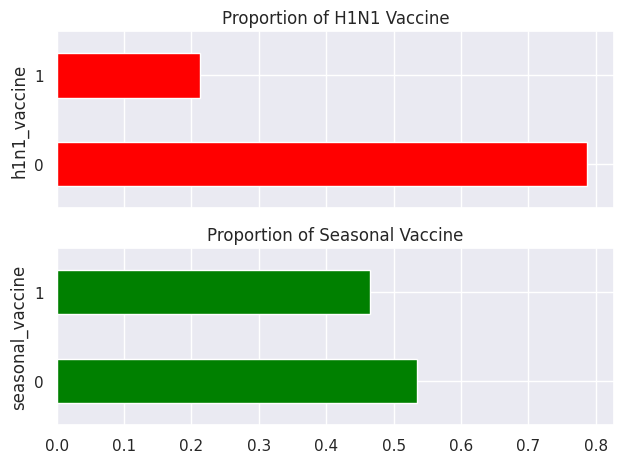

In [ ]:
# Let's start by taking a look at our distribution of the two target variables.

fig, ax = plt.subplots(2, 1, sharex=True)

n_obs = y.shape[0]

(y['h1n1_vaccine'].value_counts().div(n_obs).plot.barh(title="Proportion of H1N1 Vaccine", ax=ax[0], color = 'red' ))

ax[0].set_ylabel("h1n1_vaccine")

(y['seasonal_vaccine'].value_counts().div(n_obs).plot.barh(title="Proportion of Seasonal Vaccine", ax=ax[1], color = 'green'))

ax[1].set_ylabel("seasonal_vaccine")

fig.tight_layout()

In [ ]:
# Conclusions:

#About 20% of persons appear to have got the H1N1 flu vaccine,
#compared to roughly 50% who had the seasonal flu shot.
#We characterize the seasonal flu vaccine goal as having balanced classes
#and the H1N1 flu vaccine target as having somewhat imbalanced classes in terms of class balance.

In [ ]:
#Check if the target variables are independent

pd.crosstab( y["h1n1_vaccine"], y["seasonal_vaccine"], margins=True, normalize=True).apply(lambda x: round(x,3))

seasonal_vaccine,0,1,All
h1n1_vaccine,,,
0,0.498,0.290,0.788
1,0.037,0.176,0.212
All,0.534,0.466,1.000


In [ ]:
#check the pearson correlation for both target variables

print("The pearson correlation coeeficient of both target variables is: ",round(y["h1n1_vaccine"].corr(y["seasonal_vaccine"], method="pearson"),3))

The pearson correlation coeeficient of both target variables is:  0.377


In [ ]:
#Conclusion:

#The somewhat positive link between these two variables is indicated by their 0.377 Pearson correlation coefficient.
#That is also evident in the cross-tabulation. The majority of those vaccinated against H1N1 also received the
#seasonal flu shot. The seasonal vaccine recipients were more likely than non-recipients to get the H1N1 vaccine,
#even if only a small percentage of them did so.

In [ ]:
#Add labels to training dataset
df=df.join(y)


ValueError: ignored

In [ ]:
#Select non-binary numeric features and target variables of the dataframe
numeric_feat = ['h1n1_concern','h1n1_knowledge','opinion_h1n1_vacc_effective', 'opinion_h1n1_risk','opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective','opinion_seas_risk', 'opinion_seas_sick_from_vacc','age_group','race', 'sex']
target_feat = ['h1n1_vaccine', 'seasonal_vaccine']

In [ ]:
#Let's print out the correlation matrix of some numeric training features and target labels
correlation_matrix=df[numeric_feat+target_feat].corr()
correlation_matrix

<ipython-input-50-4289fee9afe6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=df[numeric_feat+target_feat].corr()


,h1n1_concern,h1n1_knowledge,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,h1n1_vaccine,seasonal_vaccine
h1n1_concern,1.000000,0.060828,0.235841,0.372716,0.355637,0.231649,0.327986,0.222392,0.121574,0.154488
h1n1_knowledge,0.060828,1.000000,0.119010,0.074394,-0.017038,0.085281,0.081156,-0.060241,0.117771,0.119779
opinion_h1n1_vacc_effective,0.235841,0.119010,1.000000,0.259813,0.061805,0.469367,0.256131,0.012539,0.267352,0.203187
opinion_h1n1_risk,0.372716,0.074394,0.259813,1.000000,0.335013,0.223904,0.562976,0.197916,0.320580,0.215650
opinion_h1n1_sick_from_vacc,0.355637,-0.017038,0.061805,0.335013,1.000000,0.078158,0.268095,0.490237,0.074580,0.027964
opinion_seas_vacc_effective,0.231649,0.085281,0.469367,0.223904,0.078158,1.000000,0.343636,-0.017043,0.177799,0.358869
opinion_seas_risk,0.327986,0.081156,0.256131,0.562976,0.268095,0.343636,1.000000,0.200435,0.255874,0.386916
opinion_seas_sick_from_vacc,0.222392,-0.060241,0.012539,0.197916,0.490237,-0.017043,0.200435,1.000000,0.008415,-0.060538
h1n1_vaccine,0.121574,0.117771,0.267352,0.320580,0.074580,0.177799,0.255874,0.008415,1.000000,0.377143
seasonal_vaccine,0.154488,0.119779,0.203187,0.215650,0.027964,0.358869,0.386916,-0.060538,0.377143,1.000000


In [ ]:
#Plot a barplot to picture the correlation of the rate of vaccination of each category with the target variables

def vaccination_rate_plot(columns, target, data, ax=None):
  counter = (df[[target, columns]].groupby([target, columns]).size().unstack(target))
  group_counter = counter.sum(axis='columns')
  proportions = counter.div(group_counter, axis='index')
  proportions.plot(kind="barh", stacked=True, ax=ax)
  ax.invert_yaxis()
  ax.legend().remove()

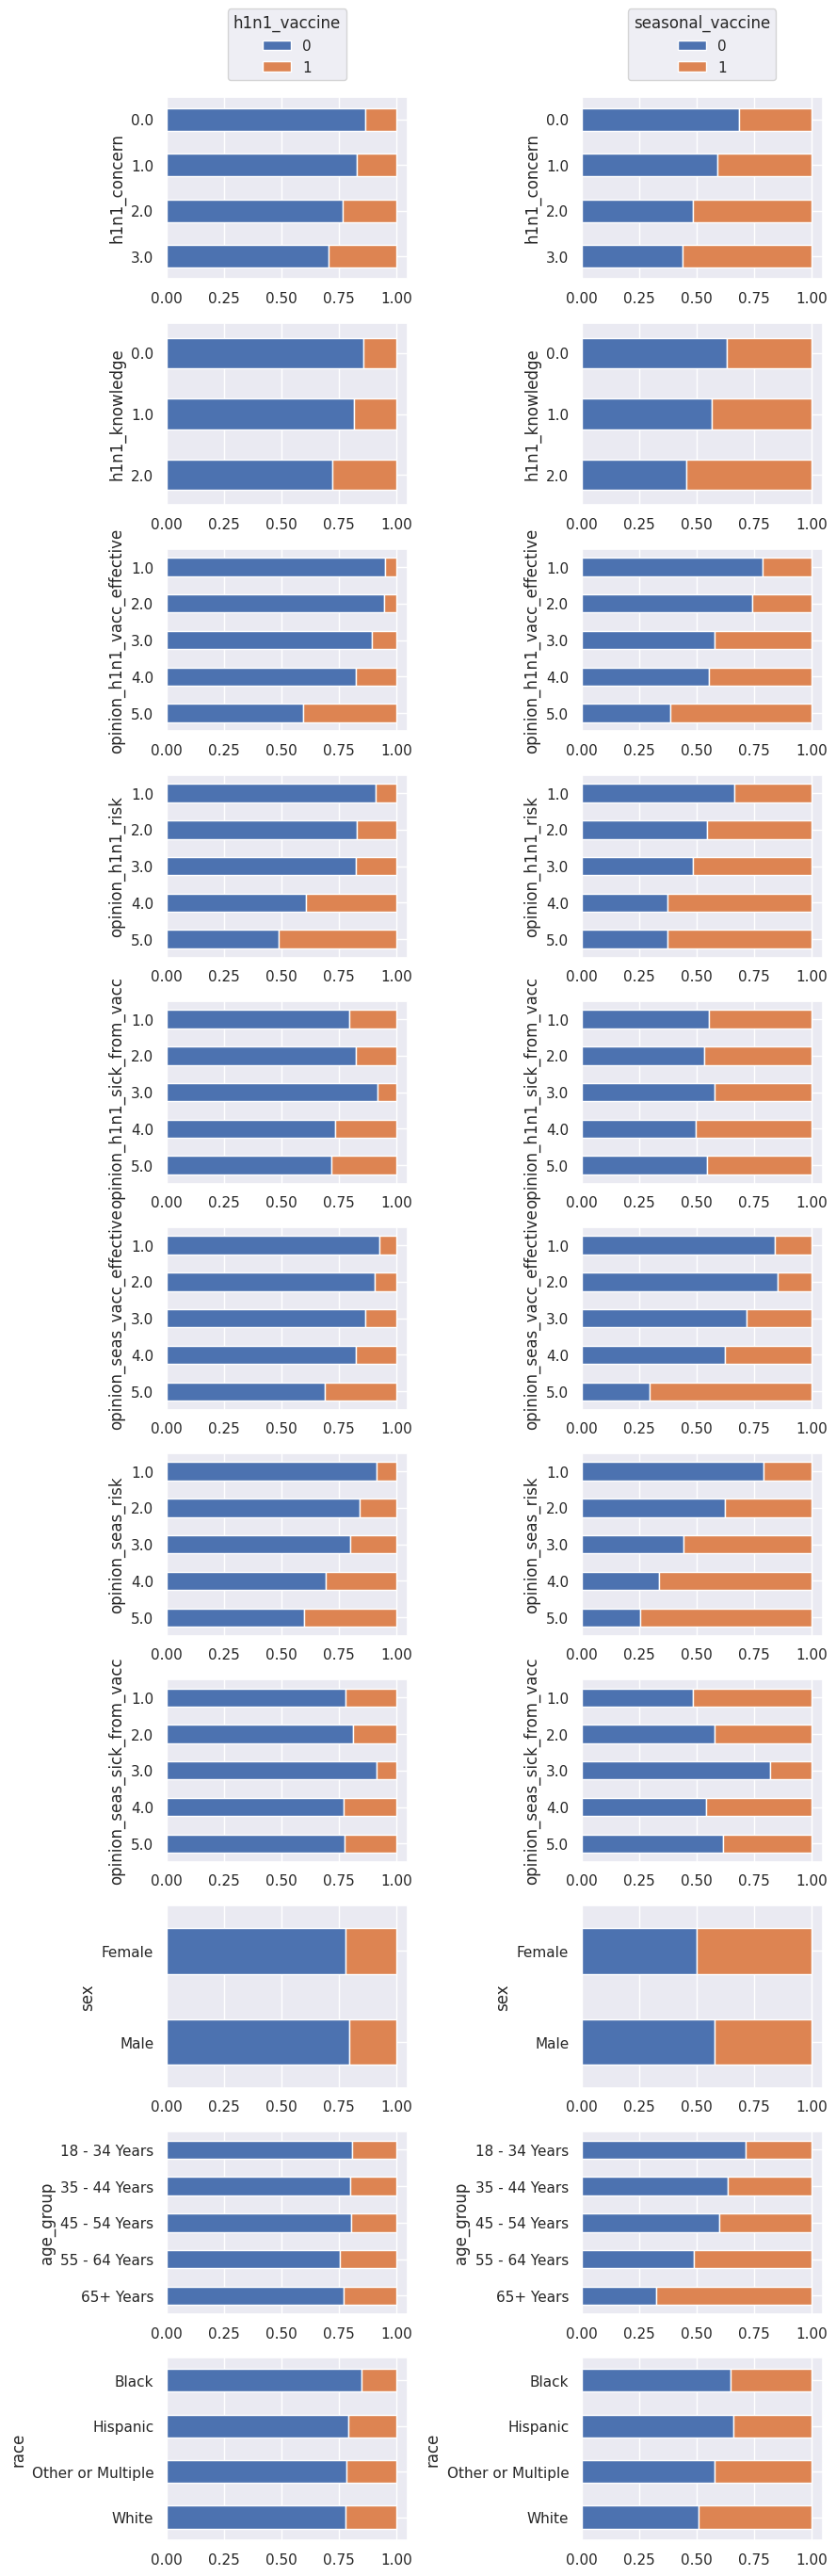

In [ ]:
columns_to_plot = ['h1n1_concern','h1n1_knowledge','opinion_h1n1_vacc_effective','opinion_h1n1_risk','opinion_h1n1_sick_from_vacc','opinion_seas_vacc_effective','opinion_seas_risk', 'opinion_seas_sick_from_vacc','sex','age_group','race']

fig, ax = plt.subplots(len(columns_to_plot), 2, figsize=(9,len(columns_to_plot)*2.5))
for idx, columns in enumerate(columns_to_plot):
    vaccination_rate_plot(columns, 'h1n1_vaccine', df, ax=ax[idx, 0])
    vaccination_rate_plot(columns, 'seasonal_vaccine', df, ax=ax[idx, 1])

ax[0, 0].legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine')
ax[0, 1].legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine')
fig.tight_layout()

In [ ]:
#Conclusion

#The knowledge and opinion questions appear to have a fairly strong signal for both of the target variables.
#The seasonal vaccine and the demographic characteristics are more strongly correlated, while the h1n1 vaccine
#is still far less so. Specifically, it is noteworthy to observe a robust association between age group and the
#seasonal vaccination, but not with the h1n1 vaccine. People seem to respond adequately to seasonal influenza,
#given that older individuals are more susceptible to consequences from the virus. However, it turns out that there
#is an intriguing correlation between age and H1N1 flu: older individuals were less likely to contract the virus
#despite having a higher risk of consequences! If this research tells us anything about causality, it appears that
#the risk variables ultimately found their way into the vaccination rates.

**3.Preprocessing**

In [ ]:
#Drop target columns from training data

df.drop(["h1n1_vaccine","seasonal_vaccine"], axis=1, inplace=True)

In [ ]:
#Adding one-hot encoding columns and dropping initial categorical columns from the dataframe

df = pd.get_dummies(df, columns=['age_group'])
df = pd.get_dummies(df, columns=['education'])
df = pd.get_dummies(df, columns=['race'])
df = pd.get_dummies(df, columns=['sex'])
df = pd.get_dummies(df, columns=['income_poverty'])
df = pd.get_dummies(df, columns=['marital_status'])
df = pd.get_dummies(df, columns=['rent_or_own'])
df = pd.get_dummies(df, columns=['employment_status'])
df = pd.get_dummies(df, columns=['hhs_geo_region'])
df = pd.get_dummies(df, columns=['census_msa'])
df = pd.get_dummies(df, columns=['employment_industry'])
df = pd.get_dummies(df, columns=['employment_occupation'])


In [ ]:
df.drop(['age_group_18 - 34 Years','education_12 Years','race_Hispanic','sex_Male','income_poverty_<= $75,000, Above Poverty','marital_status_Married','rent_or_own_Own','employment_status_Employed','hhs_geo_region_atmpeygn','census_msa_MSA, Principle City','employment_industry_arjwrbjb','employment_occupation_cmhcxjea'],axis=1,inplace=True)

**4. Building some models**

In [178]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
RANDOM_SEED = 42

In [179]:
new_cols = ['h1n1_concern','h1n1_knowledge','behavioral_antiviral_meds',
 'behavioral_avoidance','behavioral_face_mask','behavioral_wash_hands',
 'behavioral_large_gatherings','behavioral_outside_home',
 'behavioral_touch_face','doctor_recc_h1n1','doctor_recc_seasonal',
 'chronic_med_condition','child_under_6_months','health_worker',
 'health_insurance','opinion_h1n1_vacc_effective','opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc','opinion_seas_vacc_effective',
 'opinion_seas_risk','opinion_seas_sick_from_vacc','household_adults',
 'household_children']


In [180]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[new_cols] = scaler.fit_transform(df[new_cols])

In [181]:
from sklearn.model_selection import train_test_split
M = df
M_train, M_test, y_train, y_test = train_test_split(M, y, random_state = 42, test_size=0.2, stratify=y,shuffle=True)

**5. Logistic Regression**

In [182]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Parameter grid for C values

param_grid = {'estimator__C': np.logspace(-2, 4, 7)}

#  MultiOutputClassifier LR model
multi_output_classifier = MultiOutputClassifier(estimator = LogisticRegression(penalty='l2', max_iter=400))

# Search ==> cross-validation
grid_search = GridSearchCV(multi_output_classifier,param_grid, cv=5, n_jobs=-1)
grid_search.fit(M_train, y_train)

GridSearchCV(cv=5,
             estimator=MultiOutputClassifier(estimator=LogisticRegression(max_iter=400)),
             n_jobs=-1,
             param_grid={'estimator__C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04])})

In [183]:
#Access the best parameters and best score
print("Best Parameters: ",grid_search.best_params_)
print("Best Score: ",round(grid_search.best_score_,3))

Best Parameters:  {'estimator__C': 0.1}
Best Score:  0.669


In [184]:
#Evaluate the model on the test set
accuracy_test = grid_search.score(M_test,y_test)
print("Accuracy on the test set is: ",round(accuracy_test,3))

Accuracy on the test set is:  0.672


In [185]:
optimal_model = grid_search.best_estimator_
y_pred = optimal_model.predict_proba(M_test)
y_pred

[array([[0.97035284, 0.02964716],
        [0.30695693, 0.69304307],
        [0.96189994, 0.03810006],
        ...,
        [0.9504682 , 0.0495318 ],
        [0.86799107, 0.13200893],
        [0.48579817, 0.51420183]]),
 array([[0.48178034, 0.51821966],
        [0.16974352, 0.83025648],
        [0.9089648 , 0.0910352 ],
        ...,
        [0.88848934, 0.11151066],
        [0.46508966, 0.53491034],
        [0.4722151 , 0.5277849 ]])]

In [186]:
print("test_probas[0].shape", y_pred[0].shape)
print("test_probas[1].shape", y_pred[1].shape)

test_probas[0].shape (5342, 2)
test_probas[1].shape (5342, 2)


In [187]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": y_pred[0][:, 1],
        "seasonal_vaccine": y_pred[1][:, 1],
    },
    index = y_test.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()

y_preds.shape: (5342, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
22317,0.029647,0.518220
1215,0.693043,0.830256
10540,0.038100,0.091035
7407,0.095462,0.127799
14697,0.111831,0.281241


In [188]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )

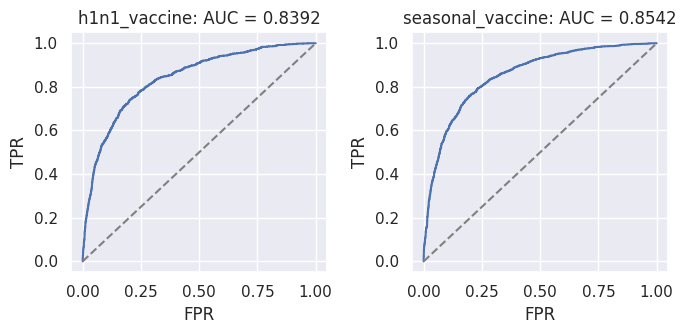

In [189]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_test['h1n1_vaccine'],
    y_preds['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_test['seasonal_vaccine'],
    y_preds['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

In [190]:
print("The roc_auc_score is: ", round(roc_auc_score(y_test, y_preds),3))

The roc_auc_score is:  0.847


**6. Random Forest**

In [192]:
#Building a Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
random_state = 42
# Parameter grid for C values

param_grid = {
    'estimator__n_estimators': [10,20,50,100,200],
    'estimator__max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    'estimator__min_samples_split':[2,5,10]
}

#  MultiOutputClassifier LR model
multi_output_classifier = MultiOutputClassifier(estimator = RandomForestClassifier(random_state = 42))

# Search ==> cross-validation
grid_search = GridSearchCV(multi_output_classifier,param_grid, cv=5, n_jobs=-1)
grid_search.fit(M_train, y_train)

GridSearchCV(cv=5,
             estimator=MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42)),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                  11, 12, 13, 14, 15],
                         'estimator__min_samples_split': [2, 5, 10],
                         'estimator__n_estimators': [10, 20, 50, 100, 200]})

In [193]:
#Access the best parameters and best score
print("Best Parameters: ",grid_search.best_params_)
print("Best Score: ",round(grid_search.best_score_,3))

Best Parameters:  {'estimator__max_depth': 14, 'estimator__min_samples_split': 10, 'estimator__n_estimators': 100}
Best Score:  0.67


In [194]:
#Evaluate the model on the test set
accuracy_test = grid_search.score(M_test,y_test)
print("Accuracy on the test set is: ",round(accuracy_test,3))

Accuracy on the test set is:  0.668


In [195]:
optimal_model = grid_search.best_estimator_
y_pred = optimal_model.predict_proba(M_test)
y_pred

[array([[0.93600343, 0.06399657],
        [0.27282054, 0.72717946],
        [0.96365789, 0.03634211],
        ...,
        [0.92825925, 0.07174075],
        [0.76328856, 0.23671144],
        [0.57999449, 0.42000551]]),
 array([[0.63661863, 0.36338137],
        [0.23903115, 0.76096885],
        [0.88188574, 0.11811426],
        ...,
        [0.77926738, 0.22073262],
        [0.40465778, 0.59534222],
        [0.3796746 , 0.6203254 ]])]

In [196]:
print("test_probas[0].shape", y_pred[0].shape)
print("test_probas[1].shape", y_pred[1].shape)

test_probas[0].shape (5342, 2)
test_probas[1].shape (5342, 2)


In [197]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": y_pred[0][:, 1],
        "seasonal_vaccine": y_pred[1][:, 1],
    },
    index = y_test.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()

y_preds.shape: (5342, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
22317,0.063997,0.363381
1215,0.727179,0.760969
10540,0.036342,0.118114
7407,0.140259,0.305537
14697,0.110954,0.291656


In [200]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )

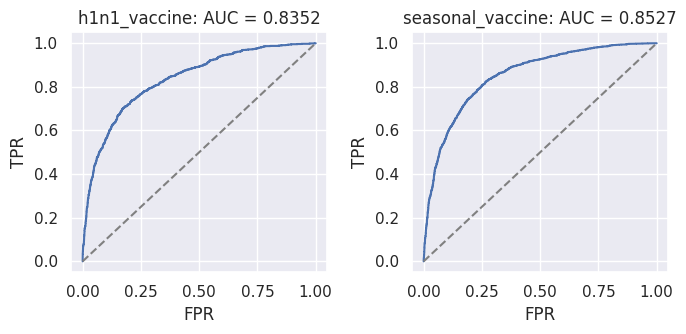

In [201]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_test['h1n1_vaccine'],
    y_preds['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_test['seasonal_vaccine'],
    y_preds['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

In [202]:
print("The roc_auc_score is: ", round(roc_auc_score(y_test, y_preds),3))

The roc_auc_score is:  0.844


**Conclusion**

In [ ]:
# Based on the prediction from both models, the logistic regression result seems to beat the Random forest result
#thus, we go with the logistic regression model with auc_roc_score 0.847 which is a reaally good score as it is close
#to 1 and shows a high correlation between the training features and the target variables which is really nice.
#from the correlation matrix, we were able to fish out the most correlated parameters with te target labels and make reasonable
#prediction with them. Thus, we achieved our initial goal as intended.